In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import os
import matplotlib.pyplot as plt
from numpy import arange
import wikipedia

In [2]:
import bs4
from bs4 import BeautifulSoup
import requests
import urllib
import urllib.request
from urllib.request import urlretrieve 
from urllib.request import urlopen, Request
import re

In [3]:
import random
import time

In [4]:
fandango = pd.read_csv('fandango_score.csv')
movies = pd.read_csv('movie_ratings_16_17.csv')
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
fandango.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [6]:
movies.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
fand = fandango[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes']].copy()

mov = movies[['movie', 'year', 'fandango', 'nr_metascore', 'nr_imdb', 'nr_tmeter', 'nr_audience']].copy()
mov.head()

,movie,year,fandango,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,3.5,4.0,3.5,4.5,4.0
1,13 Hours,2016,4.5,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,3.0,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,4.5,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,3.0,3.0,3.0,3.5,3.0


# Assigning only 1 year per dataframe

In [8]:
fand['year'] = fand['FILM'].str[-5:-1].astype(int)

In [9]:
fand['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [10]:
fand_15 = fand[fand['year']==2015]
fand_16 = fand[fand['year']==2016]
fand_16


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,year


In [11]:
mov_16 = mov[mov['year'] == 2016]
mov_16

,movie,year,fandango,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,3.5,4.0,3.5,4.5,4.0
1,13 Hours,2016,4.5,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,3.0,2.5,3.5,2.0,2.5
4,A Hologram for the King,2016,3.0,3.0,3.0,3.5,3.0
5,A Monster Calls,2016,4.0,4.0,4.0,4.5,4.0
...,...,...,...,...,...,...,...
207,Whiskey Tango Foxtrot,2016,3.5,3.0,3.5,3.5,3.0
208,Why Him?,2016,4.0,2.0,3.0,2.0,3.0
209,X-Men: Apocalypse,2016,4.0,2.5,3.5,2.5,3.5
212,Zoolander 2,2016,2.5,1.5,2.5,1.0,1.0


# Comparing rating distribution in 2015 and 2016

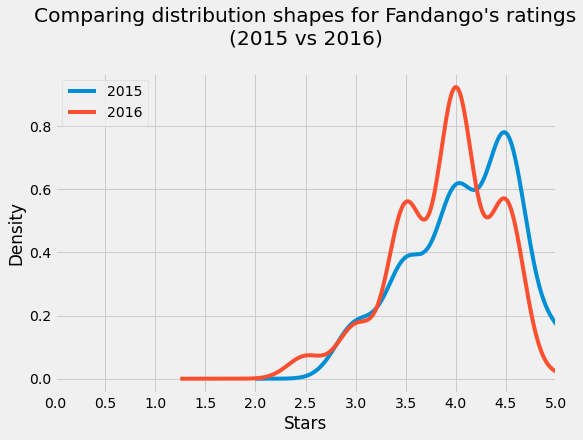

In [12]:

plt.style.use('fivethirtyeight')

fand_15['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))

mov_16['fandango'].plot.kde(label = '2016', legend = True)
#fandango['RT_norm'].plot.kde(label = 'Rotten', legend = True)


plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

In [13]:
fand_15['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [14]:
mov_16['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [15]:
test1 = fand.loc[:3].copy()

In [16]:
def scrape_distribute(df):
    # 1. Input:
    search_query = df['title_urled']
    # 2. Put the title into wikipedia search and extract the link to the first result:(it's not the first link!!!)
    url = "https://en.wikipedia.org/w/index.php?search="+search_query+"&title=Special:Search&profile=advanced&fulltext=1&ns0=1"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'lxml')
    web_links = soup.find_all("a")
    # this is the last minute hack, in case there are no search results!!:
    if len(web_links)>43:
    # 3. the first result of our seach query is actually the eleventh link on the results page:    
        movie_path = web_links[10].get("href")   
        # 4. now lets scrape all of the infobox-labels into a list a check how long is that list:
        response = requests.get("https://en.wikipedia.org"+movie_path)
        content = response.content
        parser = BeautifulSoup(content, 'html.parser')
        par_len = len(parser.find_all("th", class_="infobox-label"))
        # 5. Loop trough infobox-labels list and find the position of 'Budget':
        for num in range(4,par_len):        
            tag_name = parser.find_all("th", class_="infobox-label")[num]
            if tag_name.text == 'Distributed by':  
                tag_numbers = parser.find_all("td", class_="infobox-data")[num]
                return tag_numbers.text
        # 6. If we can't find the budget:
        else:
            return None

In [17]:
def scrape_producer(df):
    # 1. Input:
    search_query = df['title_urled']
    # 2. Put the title into wikipedia search and extract the link to the first result:(it's not the first link!!!)
    url = "https://en.wikipedia.org/w/index.php?search="+search_query+"&title=Special:Search&profile=advanced&fulltext=1&ns0=1"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'lxml')
    web_links = soup.find_all("a")
    # this is the last minute hack, in case there are no search results!!:
    if len(web_links)>43:
    # 3. the first result of our seach query is actually the eleventh link on the results page:    
        movie_path = web_links[10].get("href")   
        # 4. now lets scrape all of the infobox-labels into a list a check how long is that list:
        response = requests.get("https://en.wikipedia.org"+movie_path)
        content = response.content
        parser = BeautifulSoup(content, 'html.parser')
        par_len = len(parser.find_all("th", class_="infobox-label"))
        # 5. Loop trough infobox-labels list and find the position of 'Budget':
        for num in range(4,par_len):        
            tag_name = parser.find_all("th", class_="infobox-label")[num]
            if tag_name.text == 'Productioncompany':  
                tag_numbers = parser.find_all("td", class_="infobox-data")[num]
                return tag_numbers.text
        # 6. If we can't find the budget:
        else:
            return None

In [18]:
def scrape_money(df):
    # 1. Input:
    search_query = df['title_urled']
    # 2. Put the title into wikipedia search and extract the link to the first result:(it's not the first link!!!)
    url = "https://en.wikipedia.org/w/index.php?search="+search_query+"&title=Special:Search&profile=advanced&fulltext=1&ns0=1"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'lxml')
    web_links = soup.find_all("a")
    # this is the last minute hack, in case there are no search results!!:
    if len(web_links)>43:
    # 3. the first result of our seach query is actually the eleventh link on the results page:    
        movie_path = web_links[10].get("href")   
        # 4. now lets scrape all of the infobox-labels into a list a check how long is that list:
        response = requests.get("https://en.wikipedia.org"+movie_path)
        content = response.content
        parser = BeautifulSoup(content, 'html.parser')
        par_len = len(parser.find_all("th", class_="infobox-label"))
        # 5. Loop trough infobox-labels list and find the position of 'Budget':
        for num in range(8,par_len):        
            tag_name = parser.find_all("th", class_="infobox-label")[num]
            if tag_name.text == 'Budget':  
                tag_numbers = parser.find_all("td", class_="infobox-data")[num]
                return tag_numbers.text
        # 6. If we can't find the budget:
        else:
            return None

In [19]:
movies['title_urled'] = movies['movie'].str.replace('[^A-Za-z0-9]+', '_', regex=True).str.strip('_').str.lower()
movies['title_urled'] = movies['title_urled'] +'_'+ movies['year'].astype(str)
movies['title_urled']

0            10_cloverfield_lane_2016
1                       13_hours_2016
2            a_cure_for_wellness_2016
3                a_dog_s_purpose_2017
4        a_hologram_for_the_king_2016
                    ...              
209             x_men_apocalypse_2016
210                           xx_2017
211    xxx_return_of_xander_cage_2017
212                  zoolander_2_2016
213                     zootopia_2016
Name: title_urled, Length: 214, dtype: object

In [20]:
# movies['producer'] = movies.apply(scrape_producer, axis=1)

In [21]:
movies['distributor'] = movies.apply(scrape_distribute, axis=1)

In [24]:
fand['title_urled'] = fand['FILM'].str.replace('[^A-Za-z0-9]+', '_', regex=True).str.strip('_').str.lower()
# fand['title_urled'] = fand['title_urled'] +'_'+ fand['year'].astype(str)
fand['title_urled']

0                 avengers_age_of_ultron_2015
1                             cinderella_2015
2                                ant_man_2015
3                         do_you_believe_2015
4                 hot_tub_time_machine_2_2015
                        ...                  
141                            mr_holmes_2015
142                                   71_2015
143                   two_days_one_night_2014
144    gett_the_trial_of_viviane_amsalem_2015
145           kumiko_the_treasure_hunter_2015
Name: title_urled, Length: 146, dtype: object

In [22]:
# fand['title_urled'] = fand_safe_copy['ulr']

NameError: name 'fand_safe_copy' is not defined

In [ ]:
# fand['producer'] = fand.apply(scrape_producer, axis=1)

In [25]:
fand['distributor'] = fand.apply(scrape_distribute, axis=1)

In [26]:
# movies['producer'].value_counts()

In [27]:
fand['distributor'].value_counts()

Warner Bros. Pictures                                                                              13
Universal Pictures                                                                                 10
Walt Disney StudiosMotion Pictures                                                                  7
20th Century Fox                                                                                    7
Lionsgate                                                                                           6
                                                                                                   ..
STX Entertainment (United States)Roadshow Films (Australia)[1]                                      1
Walt Disney Studios Motion Pictures                                                                 1
Entertainment One Films[1] (United Kingdom)Diaphana Films (France)Prokino Filmverleih (Germany)     1
20th Century Fox (United States)\nParamount Pictures (International)              

In [28]:
def scrape_infobox(df, keyword):
    # 1. Input:
    search_query = df['title_urled']
    # 2. Put the title into wikipedia search and extract the link to the first result:(it's not the first link!!!)
    url = "https://en.wikipedia.org/w/index.php?search="+search_query+"&title=Special:Search&profile=advanced&fulltext=1&ns0=1"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'lxml')
    web_links = soup.find_all("a")
    # this is the last minute hack, in case there are no search results!!:
    if len(web_links)>43:
    # 3. the first result of our seach query is actually the eleventh link on the results page:    
        movie_path = web_links[10].get("href")   
        # 4. now lets scrape all of the infobox-labels into a list a check how long is that list:
        response = requests.get("https://en.wikipedia.org"+movie_path)
        content = response.content
        parser = BeautifulSoup(content, 'html.parser')
        par_len = len(parser.find_all("th", class_="infobox-label"))
        # 5. Loop trough infobox-labels list and find the position of 'keyword':
        for num in range(4,par_len):        
            tag_name = parser.find_all("th", class_="infobox-label")[num]
            if tag_name.text == keyword:  
                tag_numbers = parser.find_all("td", class_="infobox-data")[num]
                return tag_numbers.text
        # 6. If we can't find the budget:
        else:
            return None

In [29]:
# SO DOES THIS:
# movies['title_urled'] = movies['movie'].str.replace('[^A-Za-z0-9]+', '_', regex=True).str.strip('_').str.lower()
# movies['title_urled'] = movies['title_urled'] +'_'+ movies['year'].astype(str)
# movies['title_urled']
movies['test'] = movies.apply(scrape_money, axis=1)
# movies

In [30]:
def scrape_money(df):
    # 1. Input:
    search_query = df['title_urled']
    # 2. Put the title into wikipedia search and extract the link to the first result:(it's not the first link!!!)
    url = "https://en.wikipedia.org/w/index.php?search="+search_query+"&title=Special:Search&profile=advanced&fulltext=1&ns0=1"
    html = urlopen(url)
    soup = BeautifulSoup(html, 'lxml')
    web_links = soup.find_all("a")
    # this is the last minute hack, in case there are no search results!!:
    if len(web_links)>43:
    # 3. the first result of our seach query is actually the eleventh link on the results page:    
        movie_path = web_links[10].get("href")   
        # 4. now lets scrape all of the infobox-labels into a list a check how long is that list:
        response = requests.get("https://en.wikipedia.org"+movie_path)
        content = response.content
        parser = BeautifulSoup(content, 'html.parser')
        par_len = len(parser.find_all("th", class_="infobox-label"))
        # 5. Loop trough infobox-labels list and find the position of 'Budget':
        for num in range(8,par_len):        
            tag_name = parser.find_all("th", class_="infobox-label")[num]
            if tag_name.text == 'Budget':  
                tag_numbers = parser.find_all("td", class_="infobox-data")[num]
                return tag_numbers.text
        # 6. If we can't find the budget:
        else:
            return None

In [31]:
# THIS ONES TAKES A FEW MINUTES:
# movies['test'] = movies.apply(scrape_money, axis=1)

In [32]:
# fand_safe_copy = fand.copy()

In [33]:
# movies_safe_copy = movies.copy()

In [36]:
# regex magic to clean the budget data: 
patt = r"\[\d\]"
# movies['test'] = movies_safe_copy['test']
# movies['test0'] = movies_safe_copy['test']
movies['is_it_mill'] = movies['test'].str.contains("million")
movies['currency'] = movies['test'].str.extract("([^\w])")
movies['test']= movies['test'].str.replace(patt, "", regex=True)
movies['test'] = movies['test'].str.replace('[$£€¥]', "", regex=True)
movies['test'] = movies['test'].str.replace('[a-z]', "", regex=True)
movies['test'] = movies['test'].str.replace('[a-z]', "", regex=True)
movies['test'] = movies['test'].str.split(pat='[-–]')
movies['low_end'] = movies['test'].str[0]
movies['low_end'] = movies['low_end'].str.replace('[^\d.-–]', "", regex=True)
movies['low_end'] = movies['low_end'].str.replace('[^\d.]',"", regex=True)
movies['low_end'] = movies['low_end'].astype(float)
# movies[movies['low_end']>500]
movies.loc[23 ,'low_end'] = 21
movies.loc[41 ,'low_end'] = 156
movies.loc[97 ,'low_end'] = 90
movies.loc[211 ,'low_end'] = 215/3
movies.loc[movies['is_it_mill'] == False, 'is_it_mill'] = True
movies

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,...,nr_metascore,nr_imdb,nr_tmeter,nr_audience,title_urled,distributor,test,is_it_mill,currency,low_end
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,...,4.0,3.5,4.5,4.0,10_cloverfield_lane_2016,Paramount Pictures,"[13, 15 ]",True,$,13.000000
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,...,2.5,3.5,2.5,4.0,13_hours_2016,Paramount Pictures,[50 ],True,$,50.000000
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,...,2.5,3.5,2.0,2.5,a_cure_for_wellness_2016,20th Century Fox,[40 ],True,$,40.000000
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,...,2.0,2.5,1.5,4.0,a_dog_s_purpose_2017,Universal Pictures[2] (Worldwide)Mister Smith ...,[22 ],True,$,22.000000
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,...,3.0,3.0,3.5,3.0,a_hologram_for_the_king_2016,\nLionsgate\nRoadside Attractions\nSaban Films...,[35 ],True,$,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.60,3.55,2.40,...,2.5,3.5,2.5,3.5,x_men_apocalypse_2016,20th Century Fox,[178 ],True,$,178.000000
210,XX,2017,64,4.7,71,17,3.0,3.20,2.35,3.55,...,3.0,2.5,3.5,1.0,xx_2017,Magnet Releasing,[2 ],True,$,2.000000
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.10,2.70,2.15,...,2.0,2.5,2.0,2.0,xxx_return_of_xander_cage_2017,\nColumbia Pictures (1–2)\nParamount Pictures ...,[T (3 ): 215 ],True,,71.666667
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.70,2.40,1.15,...,1.5,2.5,1.0,1.0,zoolander_2_2016,Paramount Pictures,"[50, 55 ]",True,$,50.000000


In [37]:
# movies[movies['low_end']>500]
movies.loc[23 ,'low_end'] = 21
movies.loc[41 ,'low_end'] = 156
movies.loc[97 ,'low_end'] = 90
movies.loc[211 ,'low_end'] = 215/3

In [42]:
movies.loc[movies['is_it_mill'] == False, 'is_it_mill'] = True

In [43]:
fand['test'] = fand.apply(scrape_money, axis=1)

In [44]:
patt = r"\[\d\]"
fand['test']= fand['test'].str.replace(patt, "", regex=True)

In [46]:
# regex magic to clean the budget data: 
patt = r"\[\d\]"
# fand['test'] = fand_safe_copy['test']
fand['is_it_mill'] = fand['test'].str.contains("million")
fand['currency'] = fand['test'].str.extract("([^\w])")
fand['test']= fand['test'].str.replace(patt, "", regex=True)
fand['test'] = fand['test'].str.replace('[$£€¥]', "", regex=True)
fand['test'] = fand['test'].str.replace('[a-z]', "", regex=True)
fand['test'] = fand['test'].str.split(pat='[-–]')
fand['low_end'] = fand['test'].str[0]
fand['low_end'] = fand['low_end'].str.replace('[^\d.-–]', "", regex=True)
fand.loc[12 ,'currency'] = '$'
fand.loc[109 ,'currency'] = '$'
fand.loc[12 ,'low_end'] = 7
fand.loc[109 ,'low_end'] = 9.6
fand.loc[31 ,'low_end'] = 10.5
fand.loc[91 ,'low_end'] = 38.5
fand['low_end'] = fand['low_end'].str.replace('[^\d.]',"", regex=True)
fand['low_end'] = fand['low_end'].astype(float)
fand.loc[fand['is_it_mill'] == False, 'low_end'] = 0.1

In [47]:
bins = np.array([0.0, 1.0, 5.0, 10.0, 20.0, 50,100,200, 350,500])

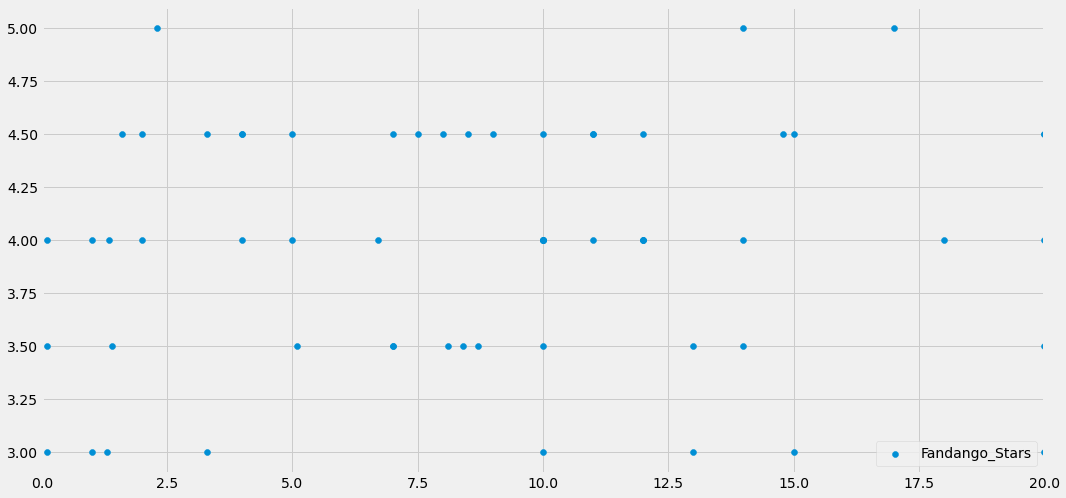

In [48]:
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(data=fand, x='low_end', y='Fandango_Stars')
plt.xlim(0,20)

plt.legend()
plt.show()

In [49]:
movies

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,...,nr_metascore,nr_imdb,nr_tmeter,nr_audience,title_urled,distributor,test,is_it_mill,currency,low_end
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,...,4.0,3.5,4.5,4.0,10_cloverfield_lane_2016,Paramount Pictures,"[13, 15 ]",True,$,13.000000
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,...,2.5,3.5,2.5,4.0,13_hours_2016,Paramount Pictures,[50 ],True,$,50.000000
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,...,2.5,3.5,2.0,2.5,a_cure_for_wellness_2016,20th Century Fox,[40 ],True,$,40.000000
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,...,2.0,2.5,1.5,4.0,a_dog_s_purpose_2017,Universal Pictures[2] (Worldwide)Mister Smith ...,[22 ],True,$,22.000000
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,...,3.0,3.0,3.5,3.0,a_hologram_for_the_king_2016,\nLionsgate\nRoadside Attractions\nSaban Films...,[35 ],True,$,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.60,3.55,2.40,...,2.5,3.5,2.5,3.5,x_men_apocalypse_2016,20th Century Fox,[178 ],True,$,178.000000
210,XX,2017,64,4.7,71,17,3.0,3.20,2.35,3.55,...,3.0,2.5,3.5,1.0,xx_2017,Magnet Releasing,[2 ],True,$,2.000000
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.10,2.70,2.15,...,2.0,2.5,2.0,2.0,xxx_return_of_xander_cage_2017,\nColumbia Pictures (1–2)\nParamount Pictures ...,[T (3 ): 215 ],True,,71.666667
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.70,2.40,1.15,...,1.5,2.5,1.0,1.0,zoolander_2_2016,Paramount Pictures,"[50, 55 ]",True,$,50.000000


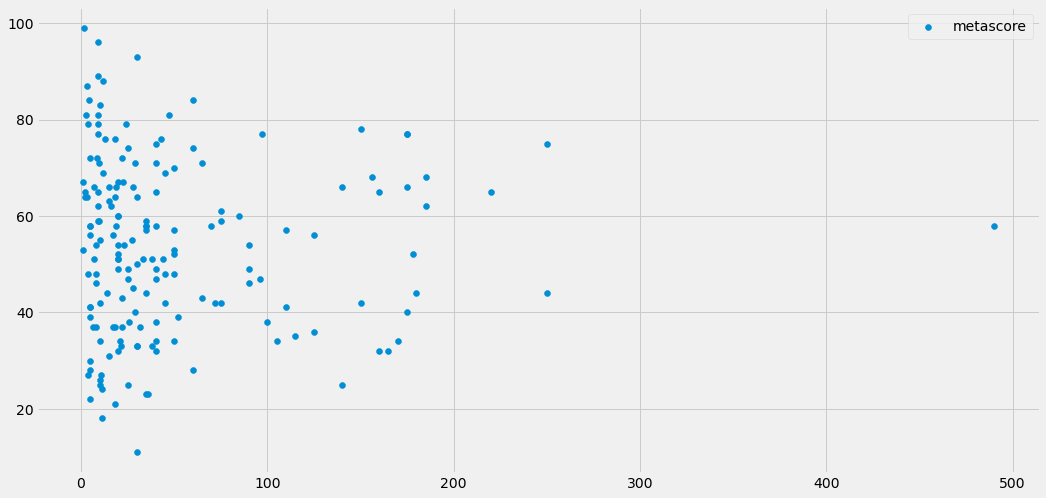

In [50]:

fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(data=movies, x='low_end', y='metascore')

plt.legend()
plt.show()

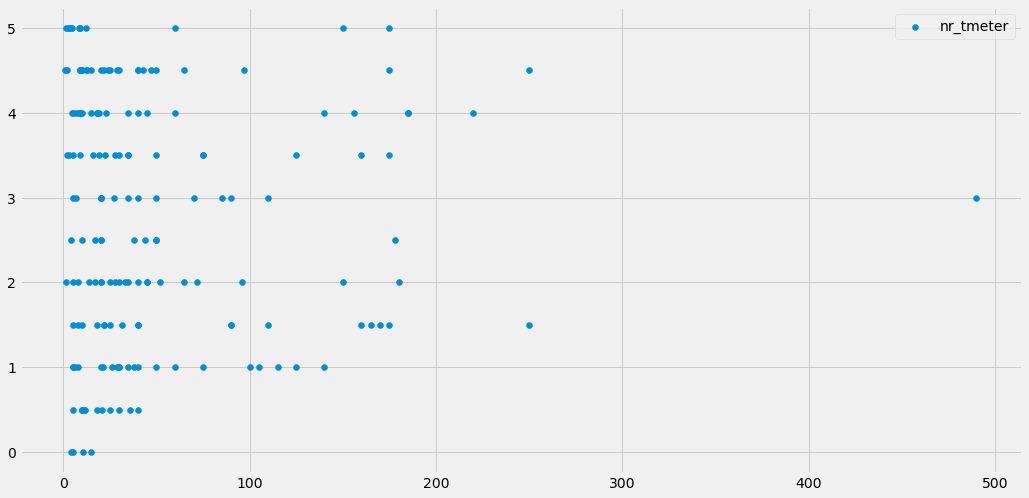

In [51]:

fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(data=movies, x='low_end', y='nr_tmeter')

plt.legend()
plt.show()

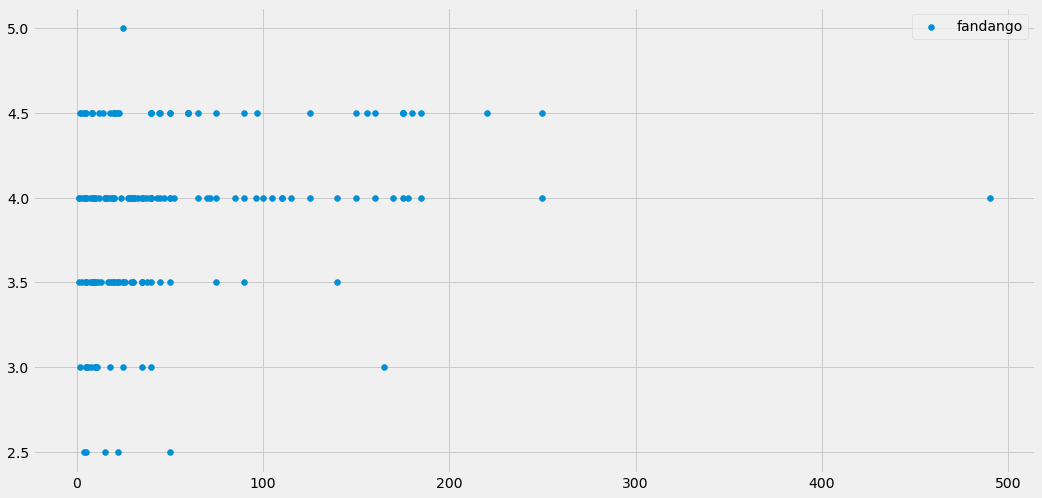

In [52]:
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(data=movies, x='low_end', y='fandango')

plt.legend()
plt.show()

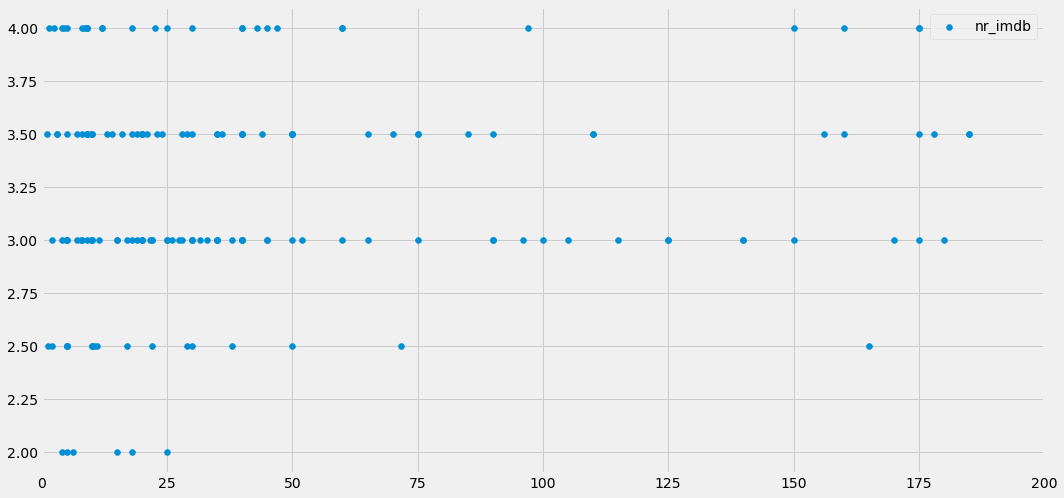

In [53]:

fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(data=movies, x='low_end', y='nr_imdb')
plt.xlim(0,200)
plt.legend()
plt.show()

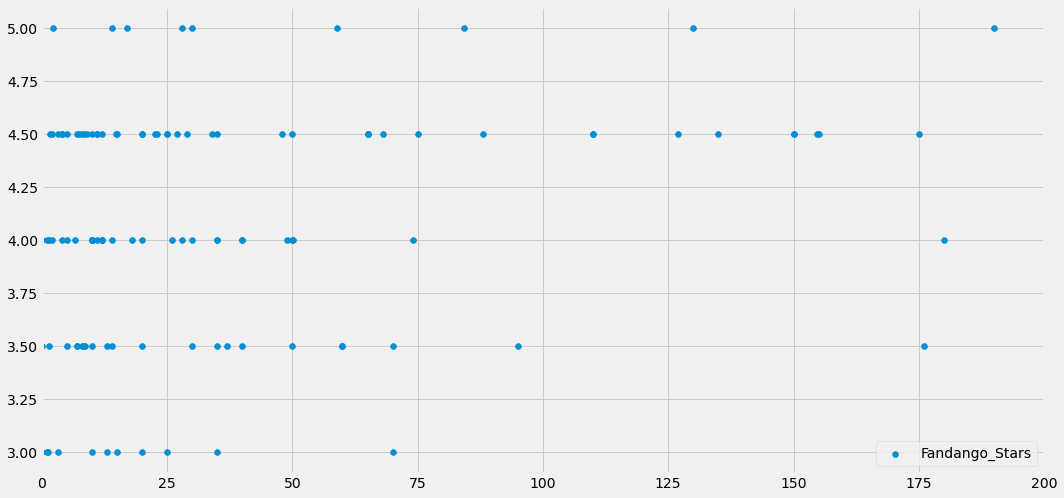

In [54]:
fig, ax = plt.subplots(figsize=(16,8))
plt.scatter(data=fand, x='low_end', y='Fandango_Stars')
plt.xlim(0,200)
plt.legend()
plt.show()

In [55]:
movies['distributor']= movies['distributor'].str.replace(patt, "", regex=True)

In [56]:
movies['distributor'].value_counts()[:10]

Warner Bros. Pictures                 18
20th Century Fox                      14
Universal Pictures                    13
Sony Pictures Releasing               12
Lionsgate                             12
Paramount Pictures                    10
Walt Disney StudiosMotion Pictures     9
Lionsgate Premiere                     9
Focus Features                         4
STX Entertainment                      4
Name: distributor, dtype: int64

In [57]:
movies['distributor'].value_counts().sum()

199

In [58]:
movies['distributor'].value_counts()[:15].sum()

118

In [59]:
top15_distributors = movies['distributor'].value_counts()[:15].index.tolist()

In [60]:
top15df = movies[movies['distributor'].isin(top15_distributors)]

In [61]:
top15df.groupby('distributor')['low_end'].mean().sort_values(ascending=False)

distributor
Walt Disney StudiosMotion Pictures    171.250000
20th Century Fox                       79.142857
Warner Bros. Pictures                  73.111765
Paramount Pictures                     57.300000
Universal Pictures                     46.269231
Sony Pictures Releasing                43.441667
Lionsgate                              39.666667
Focus Features                         37.875000
STX Entertainment                      21.550000
The Weinstein Company                  17.333333
Lionsgate Premiere                      9.800000
Open Road Films                         8.750000
\nBH Tilt\nHigh Top Releasing\n         4.500000
A24                                     2.250000
Saban Films                             2.000000
Name: low_end, dtype: float64

In [62]:
top15 = top15df.groupby('distributor')['low_end'].sum().sort_values(ascending=False).to_frame()

In [63]:
waltdf = movies[movies['distributor']=='Walt Disney StudiosMotion Pictures']
univ = movies[movies['distributor']=='Universal Pictures']
lion = movies[movies['distributor']=='Lionsgate Premiere']
warner = movies[movies['distributor']=='Warner Bros. Pictures']



In [64]:
fand['year'] = fand['FILM'].str[-5:-1].astype(int)
fanda_15 = fand[fand['year']==2015]
fanda_16 = fand[fand['year']==2016]

mova_16 = movies[movies['year'] == 2016]
mova_16

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,...,nr_metascore,nr_imdb,nr_tmeter,nr_audience,title_urled,distributor,test,is_it_mill,currency,low_end
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,...,4.0,3.5,4.5,4.0,10_cloverfield_lane_2016,Paramount Pictures,"[13, 15 ]",True,$,13.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,...,2.5,3.5,2.5,4.0,13_hours_2016,Paramount Pictures,[50 ],True,$,50.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,...,2.5,3.5,2.0,2.5,a_cure_for_wellness_2016,20th Century Fox,[40 ],True,$,40.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,...,3.0,3.0,3.5,3.0,a_hologram_for_the_king_2016,\nLionsgate\nRoadside Attractions\nSaban Films...,[35 ],True,$,35.0
5,A Monster Calls,2016,76,7.5,87,84,4.0,3.80,3.75,4.35,...,4.0,4.0,4.5,4.0,a_monster_calls_2016,\nUniversal Pictures (Spain)\nEntertainment On...,[43 ],True,$,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Whiskey Tango Foxtrot,2016,57,6.6,67,55,3.5,2.85,3.30,3.35,...,3.0,3.5,3.5,3.0,whiskey_tango_foxtrot_2016,Paramount Pictures,[35 ],True,$,35.0
208,Why Him?,2016,39,6.4,40,57,4.0,1.95,3.20,2.00,...,2.0,3.0,2.0,3.0,why_him_2016,20th Century Fox,[52 ],True,$,52.0
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.60,3.55,2.40,...,2.5,3.5,2.5,3.5,x_men_apocalypse_2016,20th Century Fox,[178 ],True,$,178.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.70,2.40,1.15,...,1.5,2.5,1.0,1.0,zoolander_2_2016,Paramount Pictures,"[50, 55 ]",True,$,50.0


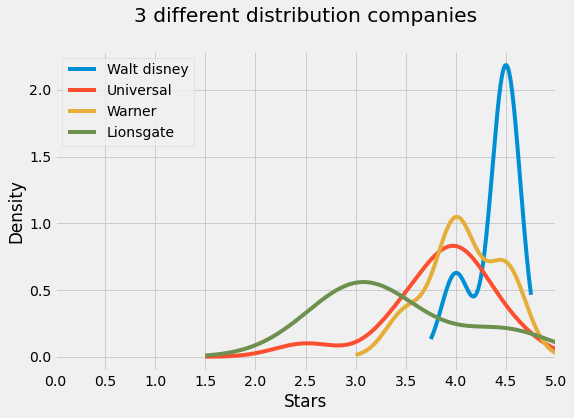

In [65]:

plt.style.use('fivethirtyeight')

waltdf['fandango'].plot.kde(label = 'Walt disney', legend = True, figsize = (8,5.5))

univ['fandango'].plot.kde(label = 'Universal', legend = True)
warner['fandango'].plot.kde(label = 'Warner', legend = True)
lion['fandango'].plot.kde(label = 'Lionsgate', legend = True)
#fandango['RT_norm'].plot.kde(label = 'Rotten', legend = True)


plt.title("3 different distribution companies",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

In [66]:
mova_16['low_end'].value_counts(bins=10)

(0.51, 49.9]      110
(49.9, 98.8]       21
(147.7, 196.6]     13
(98.8, 147.7]       9
(245.5, 294.4]      2
(196.6, 245.5]      1
(441.1, 490.0]      1
(294.4, 343.3]      0
(343.3, 392.2]      0
(392.2, 441.1]      0
Name: low_end, dtype: int64

In [67]:
mov16_200 = mova_16[mova_16['low_end']>100].copy()
mov16_100 = mova_16[(mova_16['low_end']>50) & (mova_16['low_end']<100)].copy()

mov16_cheap2 = mova_16[(mova_16['low_end']>10) & (mova_16['low_end']<50)].copy()
mov16_cheap1 = mova_16[(mova_16['low_end']>5) & (mova_16['low_end']<10)].copy()


mov16_cheap0 = mova_16[mova_16['low_end']<5].copy()

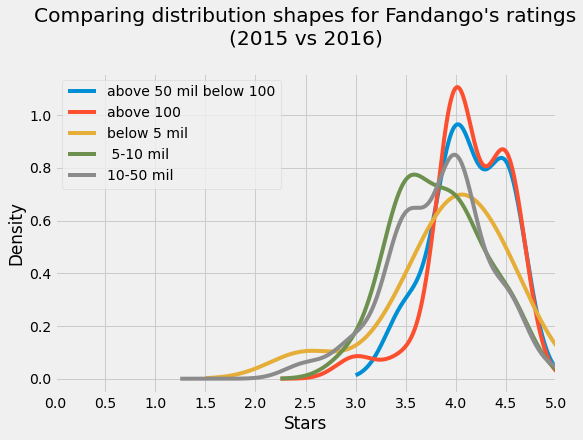

In [68]:

plt.style.use('fivethirtyeight')

mov16_100['fandango'].plot.kde(label = 'above 50 mil below 100', legend = True, figsize = (8,5.5))

mov16_200['fandango'].plot.kde(label = 'above 100', legend = True)
mov16_cheap0['fandango'].plot.kde(label = 'below 5 mil', legend = True)
mov16_cheap1['fandango'].plot.kde(label = ' 5-10 mil', legend = True)
mov16_cheap2['fandango'].plot.kde(label = '10-50 mil', legend = True)
#fandango['RT_norm'].plot.kde(label = 'Rotten', legend = True)


plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

In [69]:
fand['low_end'].value_counts(bins=bins)

(20.0, 50.0]      28
(10.0, 20.0]      22
(5.0, 10.0]       20
(50.0, 100.0]     15
(1.0, 5.0]        14
(100.0, 200.0]    13
(-0.001, 1.0]      5
(200.0, 350.0]     1
(350.0, 500.0]     0
Name: low_end, dtype: int64

In [70]:
fand.dropna()[fand['low_end'].dropna().str.contains('[^\d.]')]

AttributeError: Can only use .str accessor with string values!

In [71]:
fand

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,year,title_urled,distributor,test,is_it_mill,currency,low_end
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,2015,avengers_age_of_ultron_2015,None,None,None,NaN,NaN
1,Cinderella (2015),5.0,4.5,12640,0.5,4.5,4.0,3.5,4.0,3.5,249,65709,12640,2015,cinderella_2015,Walt Disney StudiosMotion Pictures,"[84.21, 95 ]",True,$,84.21
2,Ant-Man (2015),5.0,4.5,12055,0.5,4.0,4.5,3.0,4.0,4.0,627,103660,12055,2015,ant_man_2015,Walt Disney StudiosMotion Pictures,"[130, 169.3 ]",True,$,130.00
3,Do You Believe? (2015),5.0,4.5,1793,0.5,1.0,4.0,1.0,2.5,2.5,31,3136,1793,2015,do_you_believe_2015,Pure Flix Entertainment,[2.3 ],True,$,2.30
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,0.5,1.5,1.5,1.5,2.5,88,19560,1021,2015,hot_tub_time_machine_2_2015,Paramount Pictures[1][2],"[14, 18 ]",True,$,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,4.5,4.0,3.5,4.0,3.5,33,7367,1348,2015,mr_holmes_2015,\nEntertainment One[1][2] (United Kingdom)\nMi...,[10 ],True,$,10.00
142,'71 (2015),3.5,3.5,192,0.0,5.0,4.0,4.0,4.0,3.5,60,24116,192,2015,71_2015,StudioCanal,[8.1 ],True,£,8.10
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0,5.0,4.0,4.5,4.5,3.5,123,24345,118,2014,two_days_one_night_2014,\nCinéart (Belgium)\nDiaphana Films (France)\n...,[7 ],True,€,7.00
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,5.0,4.0,4.5,3.5,4.0,19,1955,59,2015,gett_the_trial_of_viviane_amsalem_2015,Les Films du Losange (France),None,None,NaN,NaN


In [72]:
fand['test3'] = fand['test'].str[1]

In [73]:
# fand['is_it_mill'] = fand['test'].str.contains("million")

In [74]:
fand['test4'] = fand['test2'].str.replace('[a-z]', "", regex=True)

KeyError: 'test2'

In [75]:
currency_list = fand['currency'].value_counts().index.tolist()

In [77]:
fand['title_urled'] = fand['FILM'].str.replace('[^A-Za-z0-9]+', '_', regex=True).str.strip('_').str.lower()
fand

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,...,IMDB_user_vote_count,Fandango_votes,year,title_urled,distributor,test,is_it_mill,currency,low_end,test3
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,3.5,4.5,3.5,3.5,4.0,...,271107,14846,2015,avengers_age_of_ultron_2015,None,None,None,NaN,NaN,None
1,Cinderella (2015),5.0,4.5,12640,0.5,4.5,4.0,3.5,4.0,3.5,...,65709,12640,2015,cinderella_2015,Walt Disney StudiosMotion Pictures,"[84.21, 95 ]",True,$,84.21,95
2,Ant-Man (2015),5.0,4.5,12055,0.5,4.0,4.5,3.0,4.0,4.0,...,103660,12055,2015,ant_man_2015,Walt Disney StudiosMotion Pictures,"[130, 169.3 ]",True,$,130.00,169.3
3,Do You Believe? (2015),5.0,4.5,1793,0.5,1.0,4.0,1.0,2.5,2.5,...,3136,1793,2015,do_you_believe_2015,Pure Flix Entertainment,[2.3 ],True,$,2.30,NaN
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,0.5,1.5,1.5,1.5,2.5,...,19560,1021,2015,hot_tub_time_machine_2_2015,Paramount Pictures[1][2],"[14, 18 ]",True,$,14.00,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),4.0,4.0,1348,0.0,4.5,4.0,3.5,4.0,3.5,...,7367,1348,2015,mr_holmes_2015,\nEntertainment One[1][2] (United Kingdom)\nMi...,[10 ],True,$,10.00,NaN
142,'71 (2015),3.5,3.5,192,0.0,5.0,4.0,4.0,4.0,3.5,...,24116,192,2015,71_2015,StudioCanal,[8.1 ],True,£,8.10,NaN
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0,5.0,4.0,4.5,4.5,3.5,...,24345,118,2014,two_days_one_night_2014,\nCinéart (Belgium)\nDiaphana Films (France)\n...,[7 ],True,€,7.00,NaN
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0,5.0,4.0,4.5,3.5,4.0,...,1955,59,2015,gett_the_trial_of_viviane_amsalem_2015,Les Films du Losange (France),None,None,NaN,NaN,NaN


In [78]:
fand_15.loc[:,'FILM'].to_csv('fandango_titles')

In [79]:
mean_15 = fand_15['Fandango_Stars'].mean()
mean_16 = mov_16['fandango'].mean()

median_15 = fand_15['Fandango_Stars'].median()
median_16 = mov_16['fandango'].median()

mode_15 = fand_15['Fandango_Stars'].mode()[0]
mode_16 = mov_16['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_15, median_15, mode_15]
summary['2016'] = [mean_16, median_16, mode_16]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


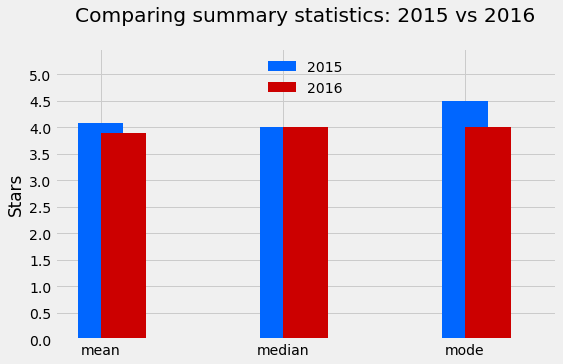

In [80]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [81]:
url = "https://en.wikipedia.org/wiki/Ant-Man_(film)"
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')
# To properly inspect the code of the page we should display and inspect the whole page:
# print(soup.prettify())
# but that's not going to look great, for the purpose of a nice display we'll just skip to the important part:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Ant-Man (film) - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b26d87bb-a09f-4524-b837-e97cef1d92f0","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Ant-Man_(film)","wgTitle":"Ant-Man (film)","wgCurRevisionId":1048829220,"wgRevisionId":1048829220,"wgArticleId":36484005,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Wikipedia pending changes protected pages","Good articles","Use American E

In [83]:
# 2.2 Lets go trough box labels and find position of 'Budget':
response = requests.get("https://en.wikipedia.org/wiki/Ant-Man_(film)")
content = response.content
parser = BeautifulSoup(content, 'html.parser')
# this is the really important line we're creating a list of all 'th' tags with class="infobox-label":
tag_name = parser.find_all("th", class_="infobox-label")
len(tag_name)

17

In [84]:
tag_name[9].text

'Productioncompany '

In [85]:
tag_name

[<th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">Directed by</th>,
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">Screenplay by</th>,
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">Story by</th>,
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">Based on</th>,
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">Produced by</th>,
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">Starring</th>,
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">Cinematography</th>,
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">Edited by</th>,
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">Music by</th>,
 <th class="infobox-label" s

In [86]:
# 2.3 print the infobox-data with that postion:    
response = requests.get("https://en.wikipedia.org/wiki/Ant-Man_(film)")
content = response.content
parser = BeautifulSoup(content, 'html.parser')
# here we're going to extract only the  one before the last element:
tag_numbers = parser.find_all("td", class_="infobox-data")[9]
print(tag_numbers.text)

Marvel Studios


In [87]:
# 2.3 print the infobox-data with that postion:    
response = requests.get("https://en.wikipedia.org/wiki/Ant-Man_(film)")
content = response.content
parser = BeautifulSoup(content, 'html.parser')
# here we're going to extract only the  one before the last element:
tag_numbers = parser.find_all("td", class_="infobox-data")[9]
print(tag_numbers.text)

Marvel Studios


In [88]:
top15.columns

Index(['low_end'], dtype='object')

In [89]:
top15['color'] = 'red'

In [90]:
top15.index

Index(['Walt Disney StudiosMotion Pictures', 'Warner Bros. Pictures',
       '20th Century Fox', 'Universal Pictures', 'Paramount Pictures',
       'Sony Pictures Releasing', 'Lionsgate', 'Focus Features',
       'STX Entertainment', 'The Weinstein Company', 'Open Road Films',
       'Lionsgate Premiere', '\nBH Tilt\nHigh Top Releasing\n', 'A24',
       'Saban Films'],
      dtype='object', name='distributor')

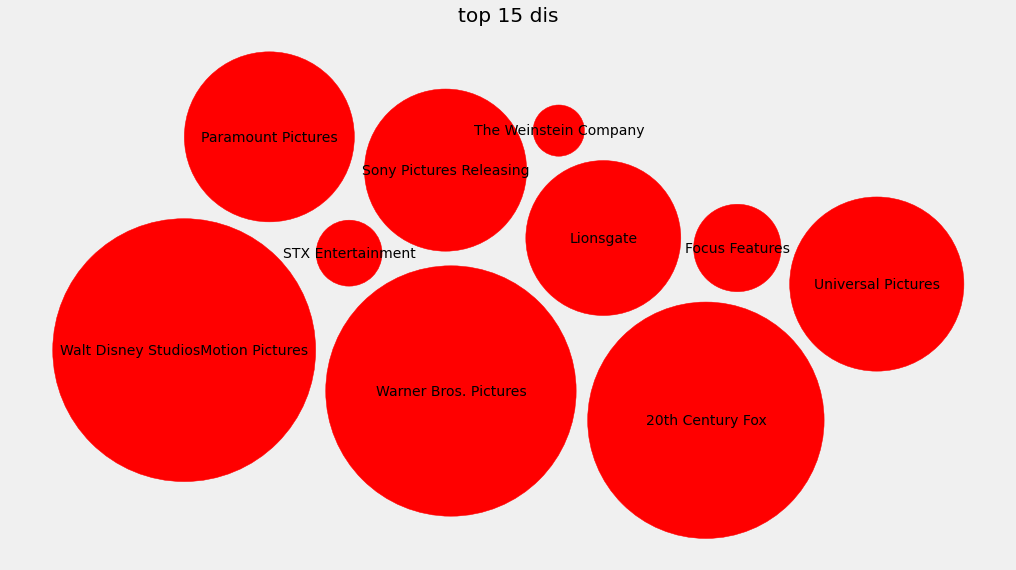

In [91]:

browser_market_share = {
    'browsers': ['firefox', 'chrome', 'safari', 'edge', 'ie', 'opera'],
    'market_share': [8.61, 69.55, 8.36, 4.12, 2.76, 2.43],
    'color': ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
}

# SOURCE: https://matplotlib.org/devdocs/gallery/misc/packed_bubbles.html
class BubbleChart:
    def __init__(self, area, bubble_spacing=40):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=top15[:10]['low_end'],
                           bubble_spacing=2.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(16,12))
bubble_chart.plot(
    ax, top15[:10].index, top15[:10]['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('top 15 dis')

plt.show()

In [92]:
top15[:10]['low_end']

distributor
Walt Disney StudiosMotion Pictures    1370.0
Warner Bros. Pictures                 1242.9
20th Century Fox                      1108.0
Universal Pictures                     601.5
Paramount Pictures                     573.0
Sony Pictures Releasing                521.3
Lionsgate                              476.0
Focus Features                         151.5
STX Entertainment                       86.2
The Weinstein Company                   52.0
Name: low_end, dtype: float64

In [93]:
fand.sort_values('low_end', ascending=False)['low_end'][:10]

74     250.0
73     190.0
45     180.0
100    176.0
140    175.0
49     155.0
88     154.6
130    150.0
128    150.0
124    135.0
Name: low_end, dtype: float64

In [94]:
movies.sort_values('low_end', ascending=False)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,...,nr_metascore,nr_imdb,nr_tmeter,nr_audience,title_urled,distributor,test,is_it_mill,currency,low_end
84,Jason Bourne,2016,58,6.7,56,57,4.0,2.90,3.35,2.80,...,3.0,3.5,3.0,3.0,jason_bourne_2016,None,[490 ],True,$,490.0
18,Batman V Superman: Dawn of Justice,2016,44,6.7,27,63,4.0,2.20,3.35,1.35,...,2.0,3.5,1.5,3.0,batman_v_superman_dawn_of_justice_2016,Warner Bros. Pictures,"[250, 300 ]",True,$,250.0
31,Captain America: Civil War,2016,75,7.9,90,89,4.5,3.75,3.95,4.50,...,4.0,4.0,4.5,4.5,captain_america_civil_war_2016,Walt Disney StudiosMotion Pictures,[250 ],True,$,250.0
140,Rogue One: A Star Wars Story,2016,65,8.0,85,88,4.5,3.25,4.00,4.25,...,3.0,4.0,4.0,4.5,rogue_one_a_star_wars_story_2016,Walt Disney StudiosMotion Pictures,[220 ],True,$,220.0
91,Kong: Skull Island,2017,62,7.1,78,75,4.0,3.10,3.55,3.90,...,3.0,3.5,4.0,4.0,kong_skull_island_2017,Warner Bros. Pictures,[185 ],True,$,185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,The LEGO Batman Movie,2017,75,7.6,91,83,4.5,3.75,3.80,4.55,...,4.0,4.0,4.5,4.0,the_lego_batman_movie_2017,None,None,None,NaN,NaN
195,The Shallows,2016,59,6.4,78,60,4.0,2.95,3.20,3.90,...,3.0,3.0,4.0,3.0,the_shallows_2016,None,None,None,NaN,NaN
199,The Wild Life,2016,36,5.3,15,28,3.0,1.80,2.65,0.75,...,2.0,2.5,1.0,1.5,the_wild_life_2016,None,None,None,NaN,NaN
202,Under the Shadow,2016,84,7.0,98,76,4.0,4.20,3.50,4.90,...,4.0,3.5,5.0,4.0,under_the_shadow_2016,\nXYZ Films\nVertical Entertainment\n,None,None,NaN,NaN
